# Zomato Data Analysis Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the data type of column - rate

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# What type of Resturant do the majority of customers order from 

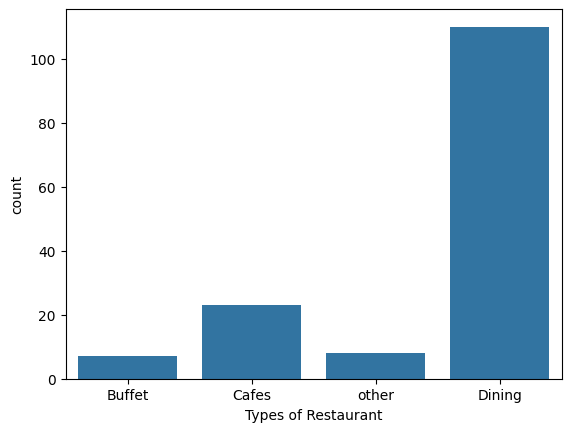

In [10]:
# Create the count plot
sns.countplot(x='listed_in(type)', data=dataframe)

# Set the labels and rotation
plt.xlabel("Types of Restaurant")

# Show the plot
plt.show()

## Coclusion - Majority of the resturant falls in dinning category


# How many votes has each type of resturant received from customers

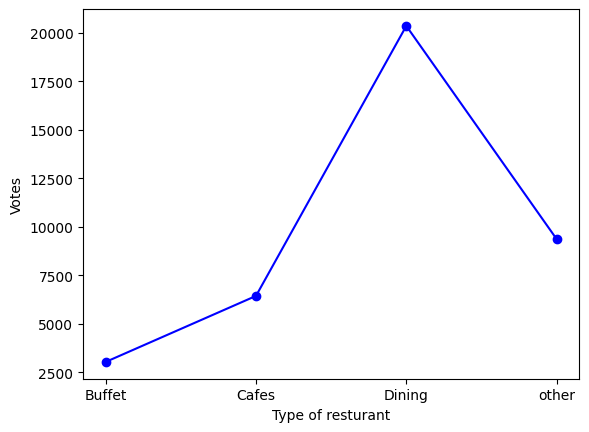

In [13]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c='blue', marker ="o")
plt.xlabel("Type of resturant")
plt.ylabel("Votes")
plt.show()

## Coclusion - Dinning resturants has received more votes

# What are the ratings that the majority of resturant have received

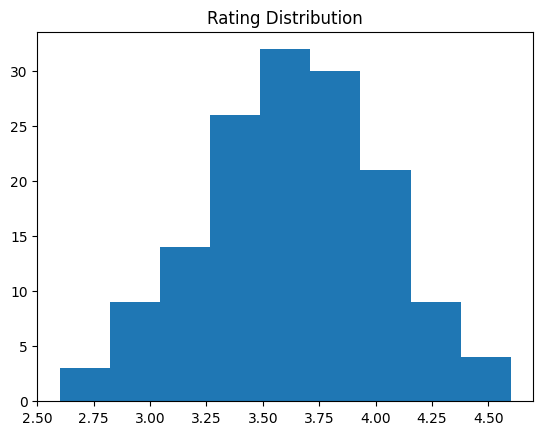

In [14]:
plt.hist(dataframe['rate'], bins = 9)
plt.title("Rating Distribution")
plt.show()

## Conclusion - Majority of resturants received ratings in between 3.5 to 4

# Zomato has observed that most couples order most of their food online.what is their average spending on each order

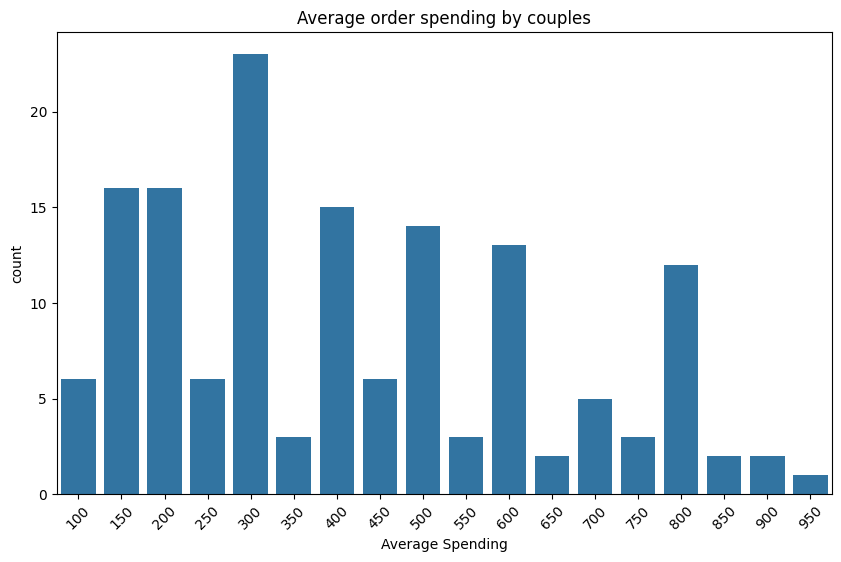

In [24]:
plt.figure(figsize=(10, 6))
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.xlabel("Average Spending")
plt.xticks(rotation = 45)
plt.title("Average order spending by couples")
plt.show()

## Coclusion - Majority of couples prefer spending 300 rupees in a returant

# Which mode receives maximum rating

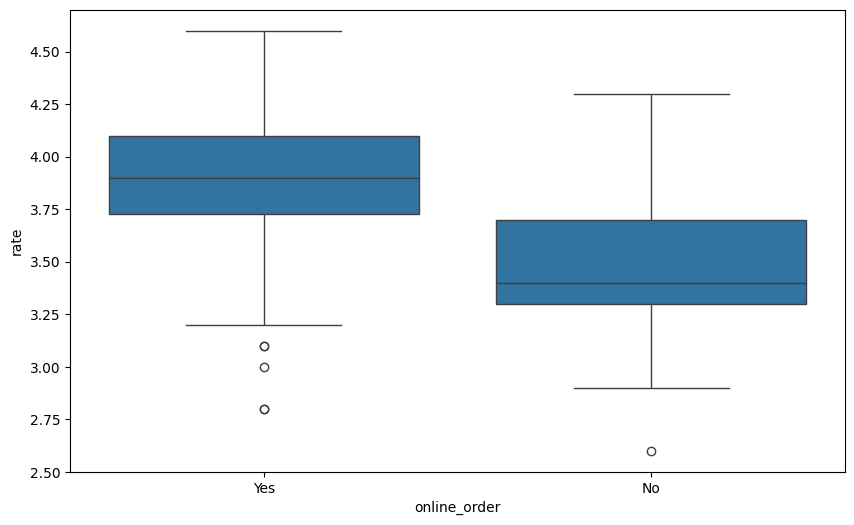

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
plt.show()

## Conclusion - Offline order receives lower rating in comparison to online order

 # Which type of resturant received more offline orders, so that company provide those customers with some good offers

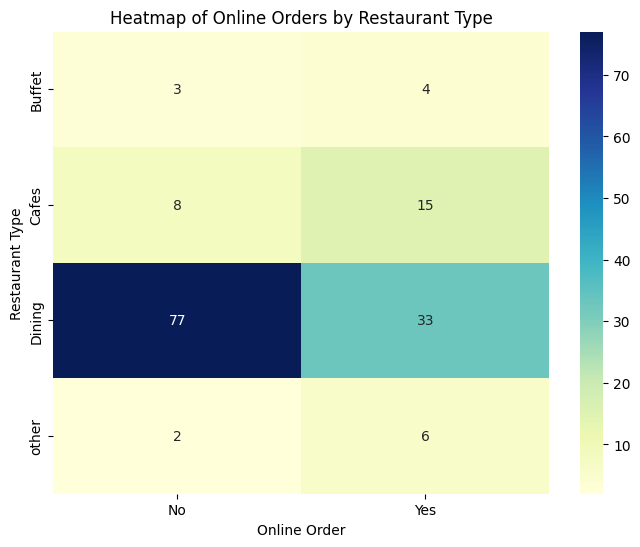

In [38]:
data = dataframe

# Load data into a DataFrame
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Online Orders by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.show()

## The analysis reveals a distinct trend in customer preferences between dining restaurants and cafes regarding order placement. Dining restaurants primarily accept offline orders, indicating that patrons generally prefer to place their orders in person at these establishments. Conversely, cafes predominantly receive online orders, suggesting that customers favor the convenience of placing orders digitally when visiting these types of venues. This pattern underscores a clear distinction in consumer behavior: while diners opt for a face-to-face interaction at restaurants, they are more inclined to utilize online ordering systems for cafes